In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas import DataFrame as df
import csv
import datetime
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import set_matplotlib_formats

In [2]:
%matplotlib inline

In [3]:
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
import matplotlib 
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 

In [4]:
df=pd.read_csv('Total.csv', encoding='cp949')

In [5]:
df.head()

,센터,형태,사,지역,가입일,총학생,총교재,인원17.04,인원17.05,인원17.06,...,요금19.08,요금19.09,요금19.10,요금19.11,요금19.12,요금20.01,요금20.02,요금20.03,요금20.04,요금20.05
0,이선미 경기용인상하1,NaN,NaN,경기남,2020-05-06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-
1,김현하 경남산청산테,NaN,NaN,경남,2020-04-28,2.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-
2,최예슬울마포공덕,교습소,사,서울,2020-04-05,11.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,6930.0,118800
3,김주아기수원정자1,학원,NaN,경기남,2020-03-18,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,-
4,김수연울강서화곡본동,학원,사,서울,2020-03-17,31.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,103950.0,138600


# A 신규가맹

#### 1. 지역별 가맹점 수

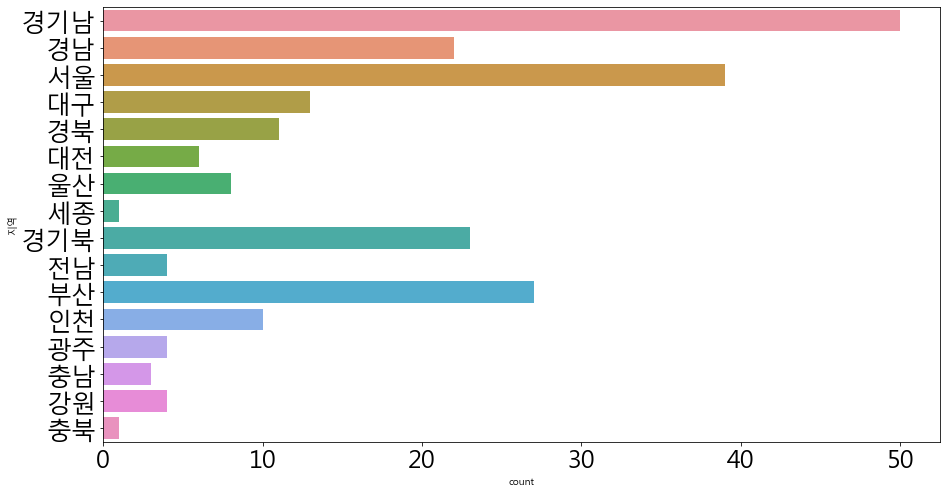

In [6]:
plt.figure(figsize=(15, 8))
sns.countplot(y='지역', data=df)

#### 2. 연도별 가맹 수

In [7]:
df["가입일"] = pd.to_datetime(df["가입일"])
df["datetime-year"] = df["가입일"].dt.year
df["datetime-month"] = df["가입일"].dt.month

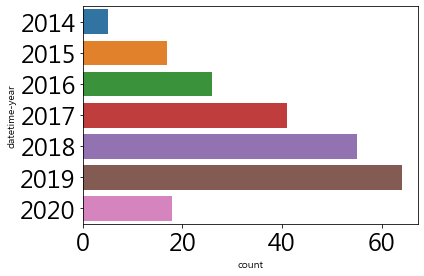

In [8]:
sns.countplot(y='datetime-year', data=df)

#### 3. 월별 가맹 수

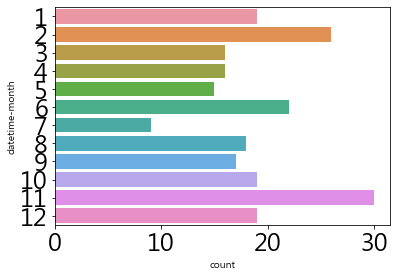

In [9]:
sns.countplot(y='datetime-month', data=df)

# B 가맹관리

#### 4. 운영형태

In [10]:
size=df['형태'].value_counts()

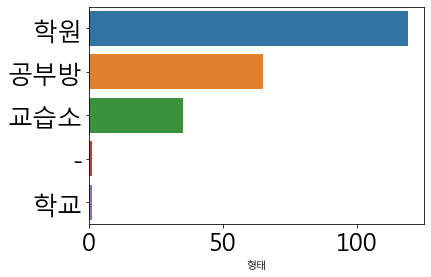

In [11]:
sns.barplot(y=size.index, x=size)

#### 5. 사업자 여부

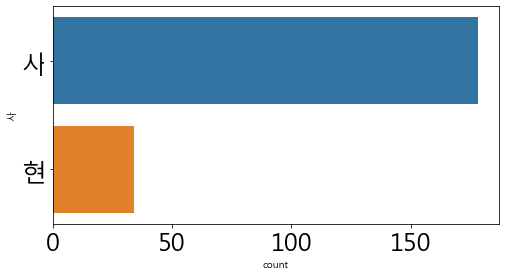

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot(y='사', data=df)

#### 6. 월별 구간분포

#### 7. 월별 온라인요금 비교

# C 문법교재

In [13]:
df_g=pd.read_csv('TotalGram(item).csv', encoding='cp949')

In [14]:
df_g["날짜"] = pd.to_datetime(df_g["날짜"])
df_g["datetime-year"] = df_g["날짜"].dt.year
df_g["datetime-month"] = df_g["날짜"].dt.month
df_g["datetime-day"] = df_g["날짜"].dt.day

#### 8. 구간별 교재량


#### 9. 월별 구매량

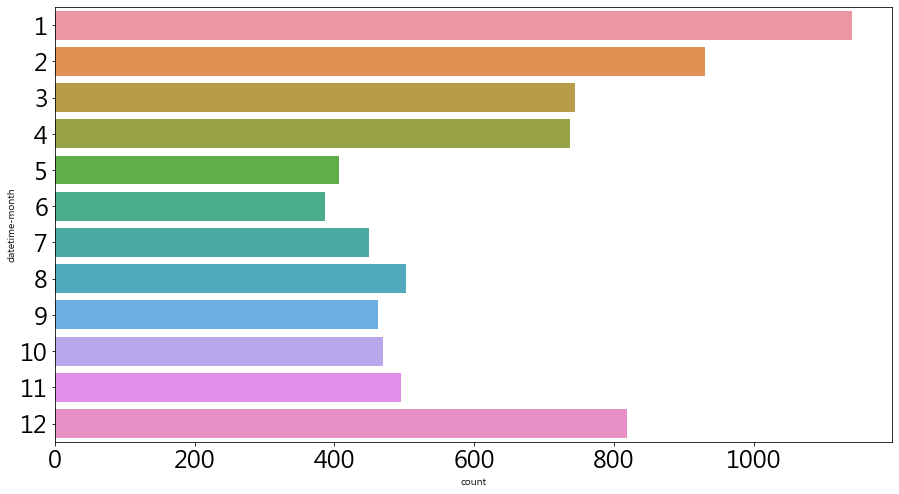

In [15]:
plt.figure(figsize=(15, 8))
sns.countplot(y='datetime-month', data=df_g)

#### 10. 일별 구매량

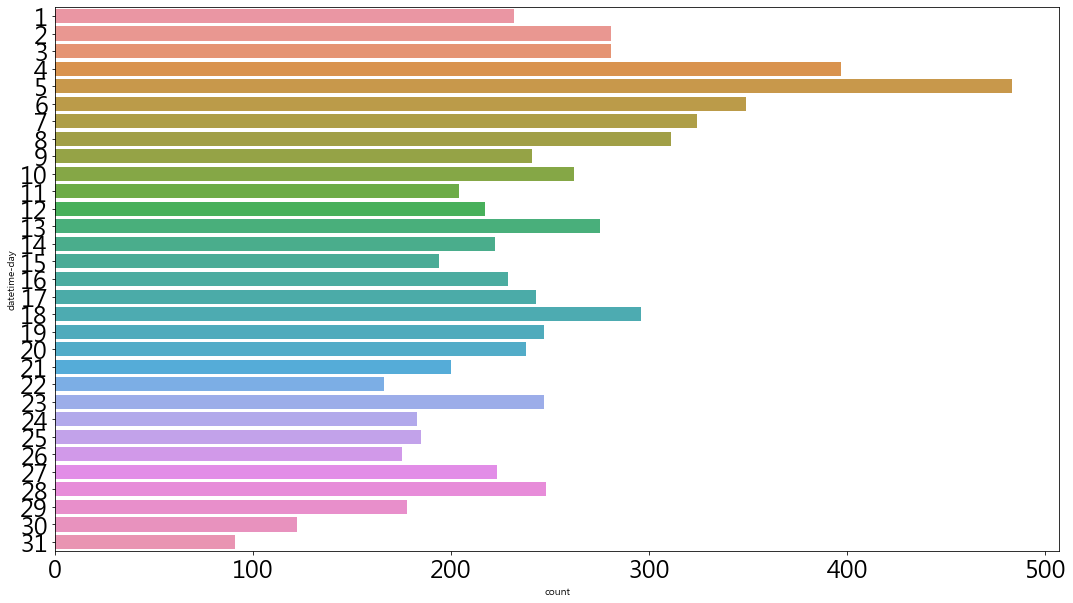

In [16]:
plt.figure(figsize=(18,10))
sns.countplot(y='datetime-day', data=df_g)

#### 11. 지역별

In [17]:
pd.pivot_table(data=df, index='지역',values='총교재', aggfunc='sum').sort_values(by='총교재', ascending=False)

,총교재
지역,
경기남,4767.0
서울,3123.0
경기북,2962.0
경남,2251.0
부산,2140.0
대구,1342.0
인천,757.0
경북,733.0
울산,571.0


# E 학생 수

#### 12. 지역별

In [18]:
pd.pivot_table(data=df, index='지역',values='총학생', aggfunc='sum').sort_values(by='총학생', ascending=False)

,총학생
지역,
경기남,31048.0
서울,18463.0
경기북,10961.0
부산,10128.0
경남,8379.0
대구,7819.0
인천,7228.0
울산,4293.0
경북,3444.0


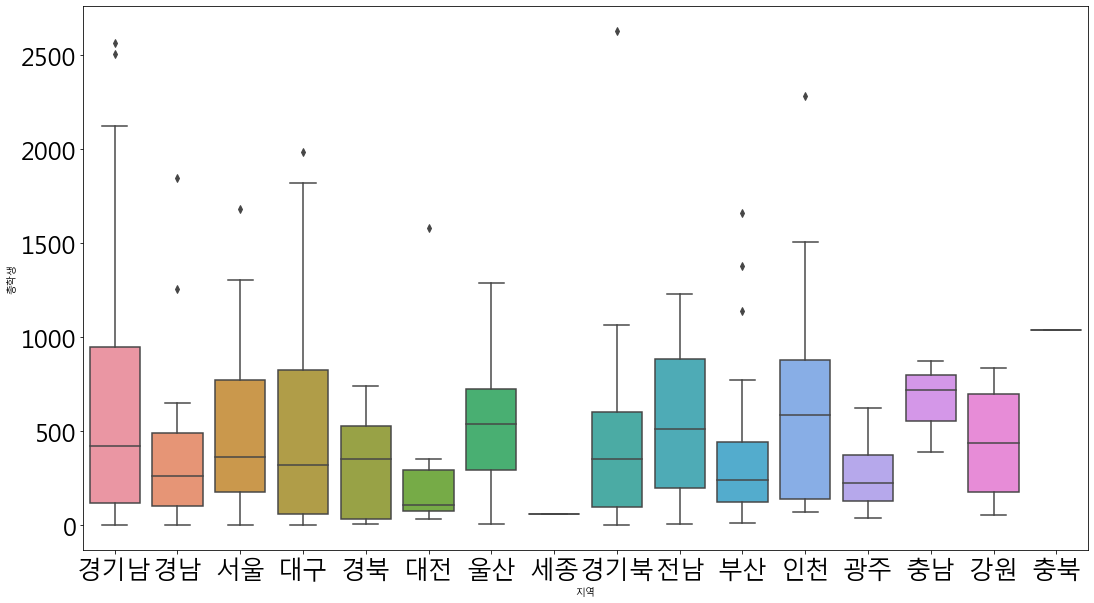

In [19]:
plt.figure(figsize=(18, 10))
sns.boxplot(x='지역',y='총학생', data=df)

# F 가맹문의자

In [23]:
consult=pd.read_csv('c_db.csv', encoding='cp949')

In [24]:
consult=consult.fillna(0)

In [25]:
consult['channel']=consult['channel'].replace('소개','recom').replace('카페','cafe').replace('기타','etc').replace('home','homepage').replace('카톡','direct').replace('홈페이지','homepage')

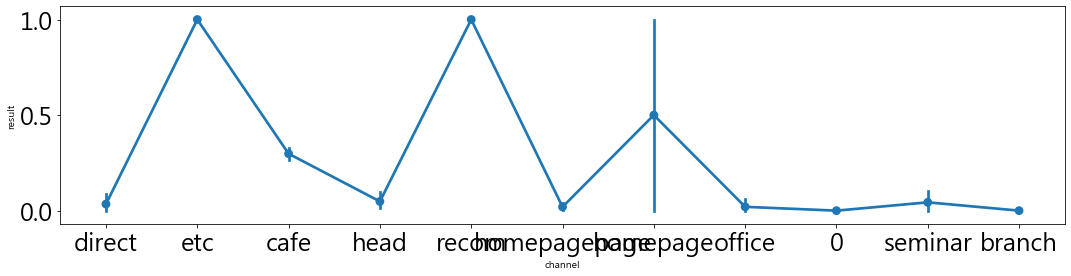

In [26]:
plt.figure(figsize=(18,4))
sns.pointplot(data=consult, x='channel',y='result')

In [27]:
consult['channel'].value_counts()

cafe            725
homepagepage    204
head             83
seminar          69
direct           58
office           50
branch           22
0                10
recom             7
etc               3
homepage          2
Name: channel, dtype: int64

In [28]:
consult['age']=consult['age'].replace('연령대?40대 초반', '41').replace('연령대?40대 중반','44').replace('연령대?40대 후반','47').replace('연령대?50대 초반','51').replace('연령대?30대 후반','37').replace('연령대?30대 중반','34').replace('연령대?50대 후반','57').replace('연령대?50대 중반','54').replace('연령대?비공개','np.nan').replace('연령대?30대 초반','31').replace('연령대?20대 후반','27').replace('연령대?10대 중반','14').replace('연령대?40대 중반','44').replace('연령대?60대 초반','61').replace('연령대?20대 중반','24').replace('연령대?20대 초반','21').replace('30대 중반','34').replace('연령대?40대 중반','44').replace('2019','np.nan').replace('40대 중반','44').replace('연령대?60대 중반','64')

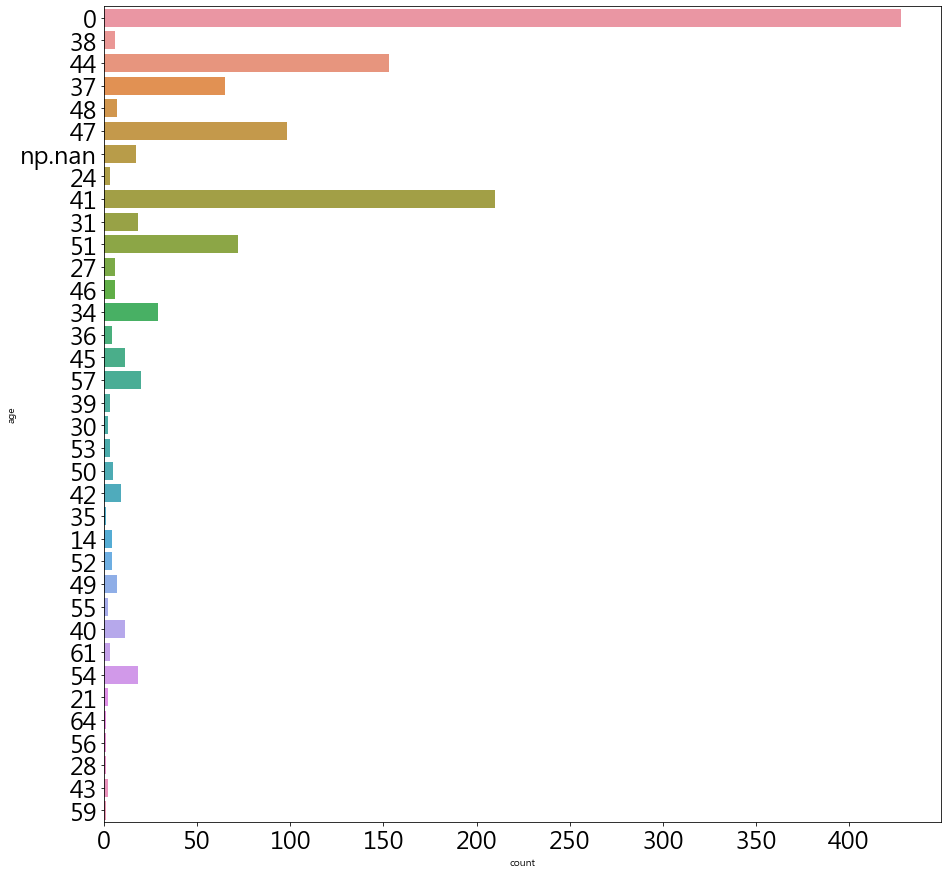

In [34]:
plt.figure(figsize=(15,15))
sns.countplot(y='age', data=consult)

In [35]:
#40대 초중반 여자가 가맹상담 건이 압도적으로 많다.